# Data Visualization

In [1]:
#import library packages
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df=data.dropna()

In [6]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

Text(0.5, 1.0, 'HATE SPEECH')

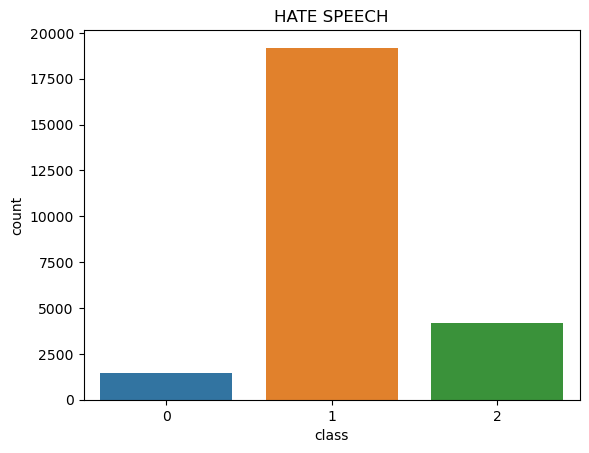

In [8]:
# plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='class',data=df)
df.loc[:,'class'].value_counts()
plt.title('HATE SPEECH')

In [9]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

In [12]:
# remove whitespaces
df['tweet']=df['tweet'].str.strip()

In [13]:
# lowercase the text
df['tweet'] = df['tweet'].str.lower()

In [14]:
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['tweet']=df['tweet'].apply(lambda x: x.translate(table))

In [15]:
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['tweet'].split(' '),axis=1)

In [16]:
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)

In [17]:
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)

In [18]:
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)

In [19]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int)
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
print(vocab)

defaultdict(<class 'int'>, {'rt': 7579, 'mayasolov': 1, 'woman': 106, 'shouldnt': 30, 'complain': 46, 'clean': 51, 'hous': 130, 'amp': 835, 'man': 557, 'alway': 285, 'take': 390, 'trash': 1129, 'mleew17': 1, 'boy': 260, 'dat': 307, 'coldtyga': 1, 'dwn': 2, 'bad': 567, 'cuffin': 10, 'hoe': 4173, '1st': 37, 'place': 76, 'urkindofbrand': 3, 'dawg': 42, '80sbaby4lif': 28, 'ever': 257, 'fuck': 2224, 'bitch': 11110, 'start': 229, 'cri': 114, 'confus': 34, 'shit': 1277, 'cganderson': 1, 'vivabas': 5, 'look': 758, 'like': 2831, 'tranni': 53, 'shenikarobert': 1, 'hear': 82, 'might': 121, 'true': 66, 'faker': 3, 'told': 149, 'ya': 474, '57361': 1, 'tmadisonx': 2, 'blow': 48, 'meclaim': 1, 'faith': 26, 'somebodi': 72, 'still': 477, '128514128514128514': 181, 'brighterday': 3, 'sit': 94, 'hate': 534, 'anoth': 176, 'got': 1298, 'much': 219, 'go': 893, '8220selfiequeenbri': 1, 'caus': 298, 'im': 2051, 'tire': 72, 'big': 244, 'come': 433, 'us': 179, 'skinni': 46, 'girls8221': 3, 'get': 1769, 'back': 

In [24]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(df.loc[:,'cleaned_text':],df['class'],test_size=0.2)

In [25]:
#pip install wordcloud

Text(0.5, 1.0, '')

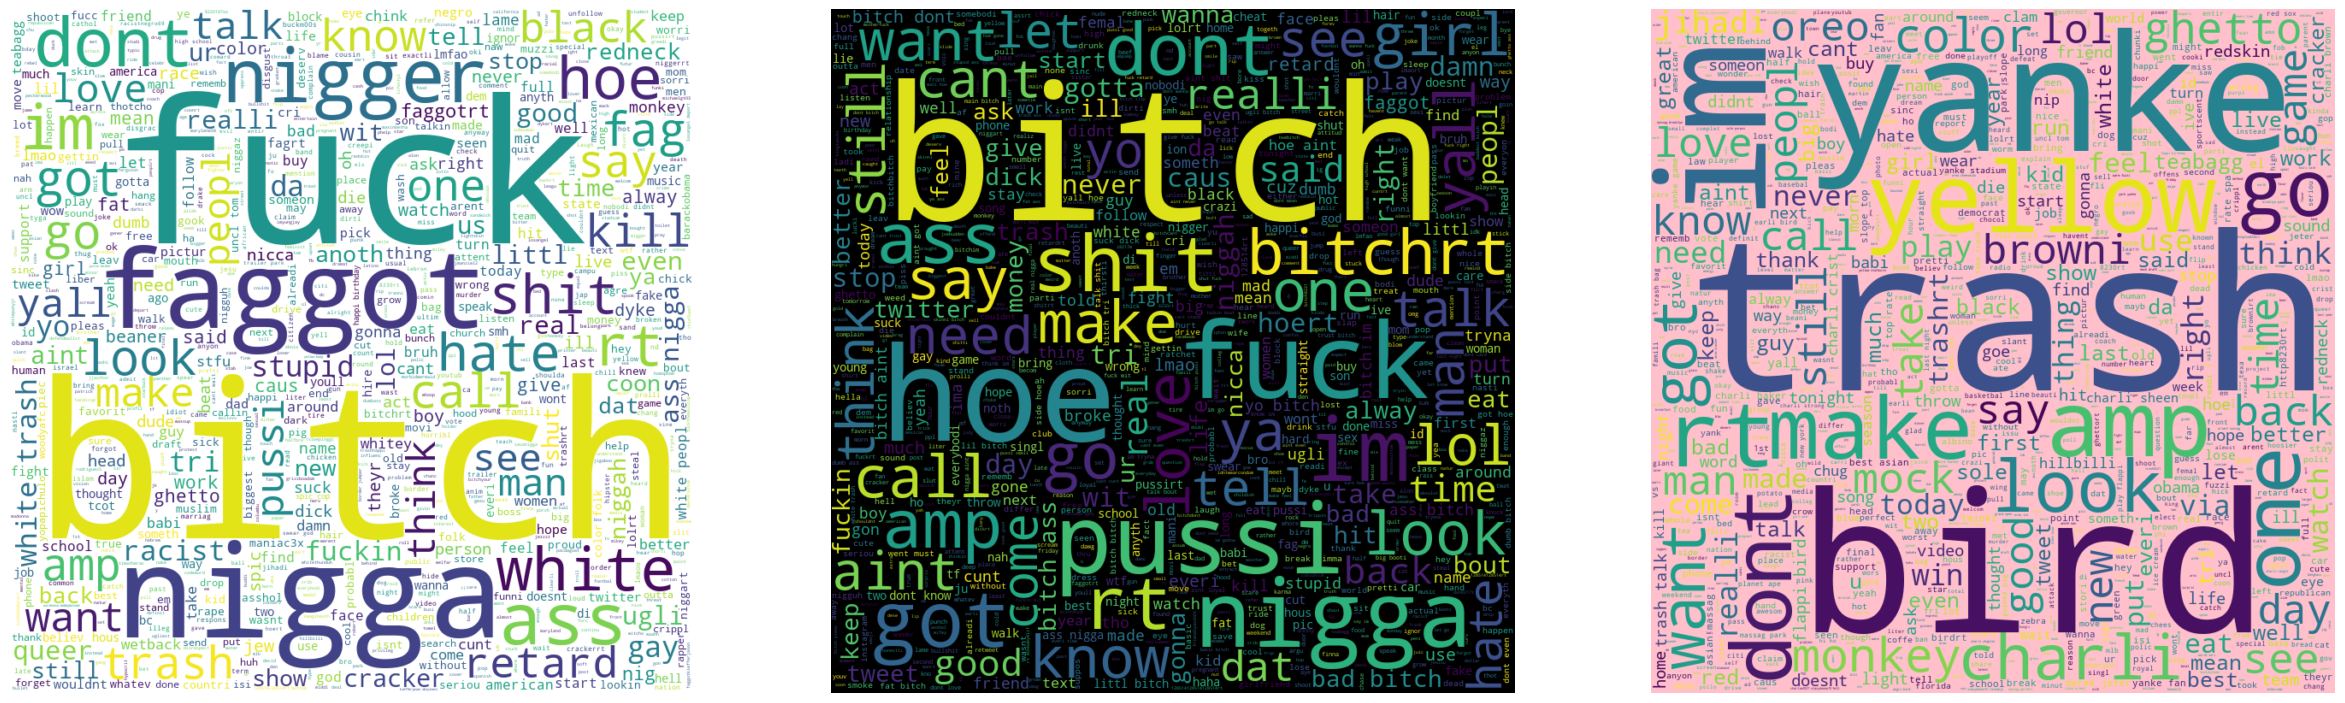

In [26]:
from wordcloud import WordCloud

hate_speech_text=''.join(X.loc[y==0,'final_text'].values)
hate_wordcloud=WordCloud(background_color='white',max_words=1000,width=800,height=800).generate(hate_speech_text)

Offensive_text=''.join(X.loc[y==1,'final_text'].values)
Offensive_wordcloud=WordCloud(background_color='black',max_words=1000,width=800,height=800).generate(Offensive_text)

No_Hate_Offensive_text=''.join(X.loc[y==2,'final_text'].values)
No_hate_wordcloud=WordCloud(background_color='pink',max_words=1000,width=800,height=800).generate(No_Hate_Offensive_text)

plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(hate_wordcloud,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Offensive_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('')

plt.subplot(1,3,3)
plt.imshow(No_hate_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('')